### Importing modules

In [8]:
# Importing modules for downloading and processing data
import pandas_datareader as web
import pandas as pd
import random

# Importing modules for plotting (using the bokeh module)
from bokeh.plotting import figure, show, output_file, output_notebook
from bokeh.palettes import Spectral11, colorblind, Inferno, BuGn, brewer
from bokeh.models import HoverTool, value, LabelSet, Legend, ColumnDataSource,LinearColorMapper,BasicTicker, PrintfTickFormatter, ColorBar

# Ignoring the warnings
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

### Inputs

In [9]:
tickers = ['AAPL','MSFT','GOOG'] # Tickers of the stocks that need to be plotted.
start = '2000-01-01' # Start date
end = '2020-03-30' # End date

### Downloading and processing data

In [10]:
df = web.DataReader(tickers, data_source='yahoo', start=start, end=end)['Close'] # Downloading data from yahoo finance from inputs

df = df.dropna() # Removing rows with missing data to ensure concurrent time series datasets

for col in df.columns:
    df[col] = (df[col]-df[col].min())/(df[col].max()-df[col].min())

### Plotting the data

In [13]:
# Defining bokeh tools that are used to explore the plot in detail
tools = 'crosshair,save,pan,box_zoom,reset,hover,wheel_zoom'

# Creating the random color for each line in the plot randomly 
colors = [(random.randrange(0, 255), random.randrange(0, 255), random.randrange(0, 255)) for i in range(len(df.columns))]

# Defining the plot canvas and parameters
plot = figure(plot_width=1600, plot_height=400, title="Title", y_axis_type="linear", x_axis_type='datetime', tools=tools)
plot.legend.location = "top_left"
plot.xaxis.axis_label = 'Year'
plot.yaxis.axis_label = 'Normalised Stock'

# Plotting data of each of the stocks based on the inputs and plot parameters
for i in range(len(df.columns)):
    plot.line(x=df.index, y=df[df.columns[i]], legend= df.columns[i], line_color=colors[i], line_width = 3)                               

# Creating the plot output
output_file("Stocks.html", title="Stocks")
show(plot)

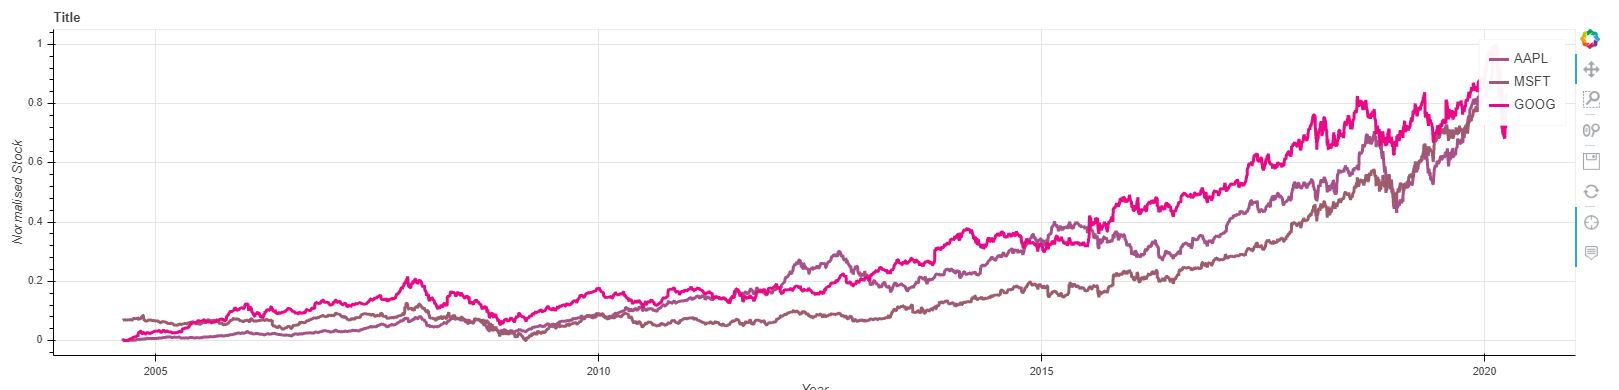